In [245]:
# Chaitanya Mangla AI - DS B1 
# Bank Customer Attrition Prediction ML Project 
# Use Classification to predict which bank custoers are likely to close their accounts 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [246]:
# Generating a synthetic dataset 
np.random.seed(42)
n_samples = 5000

data = pd.DataFrame({
    'CustomerID' : np.arange(1, n_samples+1),
    'Age': np.random.randint(18,70,n_samples),
    'Gender' : np.random.choice(['Male', 'Female'], n_samples),
     'Geography' : np.random.choice(['France', 'Spain', 'Germany'], n_samples),
     'Tenure' : np.random.randint(0,10,n_samples), 
     'Balance' : np.random.uniform(0, 25000, n_samples),
      'NumOfProducts': np.random.randint(1, 4, n_samples),
    'HasCreditCard': np.random.choice([0,1], n_samples),
    'IsActiveMember': np.random.choice([0,1], n_samples),
    'EstimatedSalary': np.random.uniform(10000, 150000, n_samples)
})
      


In [247]:
data # the whole data has been printed here in tabular form 

CustomerID  Age  Gender Geography  Tenure       Balance  NumOfProducts  \
0              1   56    Male     Spain       7   1883.872406              2   
1              2   69  Female    France       8  23958.714591              2   
2              3   46  Female    France       5  10875.298186              3   
3              4   32    Male   Germany       9  15581.437742              3   
4              5   60    Male     Spain       1  16657.633078              2   
...          ...  ...     ...       ...     ...           ...            ...   
4995        4996   24    Male     Spain       6  12854.704523              3   
4996        4997   66  Female   Germany       8  10156.870014              2   
4997        4998   26  Female     Spain       8   1120.407767              1   
4998        4999   53  Female   Germany       0  23937.288947              2   
4999        5000   36  Female   Germany       0  23821.738009              3   

      HasCreditCard  IsActiveMember  EstimatedSalary  
0                 0               0     55175.683538  
1                 1               0     79148.195594  
2                 0               0     27944.499818  
3                 0               0    140171.961319  
4                 0               1     54631.448347  
...             ...             ...              ...  
4995              0               1    111433.488481  
4996              1               1     27934.085674  
4997              1               1     27274.455181  
4998              0               1    135390.809391  
4999              1               0    124731.573523  

[5000 rows x 10 columns]

In [248]:
# Simulate the churn probability based on some rules 
data['Exited'] = (
    (data['Age'] > 50).astype(int) + 
    (data['Balance'] < 50000).astype(int)+
    (1 - data['IsActiveMember']) +
    (data['NumOfProducts'] == 1).astype(int)
)
data['Exited'] = (data['Exited']>2).astype(int)
data 

# Here one more column of the exited is added which shows that if there are more than 2 risk factors ten exited is labelled as 1 otherwise 0

CustomerID  Age  Gender Geography  Tenure       Balance  NumOfProducts  \
0              1   56    Male     Spain       7   1883.872406              2   
1              2   69  Female    France       8  23958.714591              2   
2              3   46  Female    France       5  10875.298186              3   
3              4   32    Male   Germany       9  15581.437742              3   
4              5   60    Male     Spain       1  16657.633078              2   
...          ...  ...     ...       ...     ...           ...            ...   
4995        4996   24    Male     Spain       6  12854.704523              3   
4996        4997   66  Female   Germany       8  10156.870014              2   
4997        4998   26  Female     Spain       8   1120.407767              1   
4998        4999   53  Female   Germany       0  23937.288947              2   
4999        5000   36  Female   Germany       0  23821.738009              3   

      HasCreditCard  IsActiveMember  EstimatedSalary  Exited  
0                 0               0     55175.683538       1  
1                 1               0     79148.195594       1  
2                 0               0     27944.499818       0  
3                 0               0    140171.961319       0  
4                 0               1     54631.448347       0  
...             ...             ...              ...     ...  
4995              0               1    111433.488481       0  
4996              1               1     27934.085674       0  
4997              1               1     27274.455181       0  
4998              0               1    135390.809391       0  
4999              1               0    124731.573523       0  

[5000 rows x 11 columns]

In [249]:
data = pd.get_dummies(data, columns=['Gender', 'Geography'], drop_first=True)
data


CustomerID  Age  Tenure       Balance  NumOfProducts  HasCreditCard  \
0              1   56       7   1883.872406              2              0   
1              2   69       8  23958.714591              2              1   
2              3   46       5  10875.298186              3              0   
3              4   32       9  15581.437742              3              0   
4              5   60       1  16657.633078              2              0   
...          ...  ...     ...           ...            ...            ...   
4995        4996   24       6  12854.704523              3              0   
4996        4997   66       8  10156.870014              2              1   
4997        4998   26       8   1120.407767              1              1   
4998        4999   53       0  23937.288947              2              0   
4999        5000   36       0  23821.738009              3              1   

      IsActiveMember  EstimatedSalary  Exited  Gender_Male  Geography_Germany  \
0                  0     55175.683538       1         True              False   
1                  0     79148.195594       1        False              False   
2                  0     27944.499818       0        False              False   
3                  0    140171.961319       0         True               True   
4                  1     54631.448347       0         True              False   
...              ...              ...     ...          ...                ...   
4995               1    111433.488481       0         True              False   
4996               1     27934.085674       0        False               True   
4997               1     27274.455181       0        False              False   
4998               1    135390.809391       0        False               True   
4999               0    124731.573523       0        False               True   

      Geography_Spain  
0                True  
1               False  
2               False  
3               False  
4                True  
...               ...  
4995             True  
4996            False  
4997             True  
4998            False  
4999            False  

[5000 rows x 12 columns]

In [250]:
# Seperating the independent and dependent feature 
X = data.drop(['CustomerID', 'Exited'], axis = 1)
y = data['Exited']

In [251]:
X # Here the Customer ID and Exited has been removed from the tabular data 

Age  Tenure       Balance  NumOfProducts  HasCreditCard  IsActiveMember  \
0      56       7   1883.872406              2              0               0   
1      69       8  23958.714591              2              1               0   
2      46       5  10875.298186              3              0               0   
3      32       9  15581.437742              3              0               0   
4      60       1  16657.633078              2              0               1   
...   ...     ...           ...            ...            ...             ...   
4995   24       6  12854.704523              3              0               1   
4996   66       8  10156.870014              2              1               1   
4997   26       8   1120.407767              1              1               1   
4998   53       0  23937.288947              2              0               1   
4999   36       0  23821.738009              3              1               0   

      EstimatedSalary  Gender_Male  Geography_Germany  Geography_Spain  
0        55175.683538         True              False             True  
1        79148.195594        False              False            False  
2        27944.499818        False              False            False  
3       140171.961319         True               True            False  
4        54631.448347         True              False             True  
...               ...          ...                ...              ...  
4995    111433.488481         True              False             True  
4996     27934.085674        False               True            False  
4997     27274.455181        False              False             True  
4998    135390.809391        False               True            False  
4999    124731.573523        False               True            False  

[5000 rows x 10 columns]

In [252]:
y  # Here only the exited column is shown here 

0       1
1       1
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Exited, Length: 5000, dtype: int64

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42) 

In [254]:
X_train  # Data on which the model is trained 

Age  Tenure       Balance  NumOfProducts  HasCreditCard  IsActiveMember  \
1840   30       2   7682.341081              3              0               1   
2115   31       3  16693.900630              3              0               1   
4437   24       6  14600.966446              2              1               1   
1146   46       2   3731.547425              1              1               0   
2486   48       5   7977.383497              2              0               0   
...   ...     ...           ...            ...            ...             ...   
4426   37       0  18829.692596              1              0               0   
466    23       3   8913.905592              3              0               0   
3092   51       9   9037.210749              2              1               1   
3772   19       0  24414.683480              1              1               0   
860    51       2  19726.849572              2              0               0   

      EstimatedSalary  Gender_Male  Geography_Germany  Geography_Spain  
1840     83951.481132         True               True            False  
2115    145626.197657        False               True            False  
4437     99265.808698         True               True            False  
1146    143817.185177         True               True            False  
2486     71938.726078         True              False            False  
...               ...          ...                ...              ...  
4426     66588.115359         True              False            False  
466     136848.154681         True              False             True  
3092     80960.825673        False               True            False  
3772     31219.135913        False              False             True  
860     139517.948121        False               True            False  

[3500 rows x 10 columns]

In [255]:
X_test # Data oj which model is tested 

Age  Tenure       Balance  NumOfProducts  HasCreditCard  IsActiveMember  \
1501   59       0  23105.942520              3              0               1   
2586   25       1  13699.194920              3              0               0   
2653   38       6  19939.138813              2              1               0   
1055   48       0  20789.237459              3              1               1   
705    53       2  24216.572829              3              1               0   
...   ...     ...           ...            ...            ...             ...   
3563   31       6  17389.629358              3              0               1   
1538   46       5  19995.736351              3              0               0   
1837   50       5  10216.442055              3              1               1   
2380   41       9  18946.157323              3              1               1   
1912   39       1  19371.246163              1              1               0   

      EstimatedSalary  Gender_Male  Geography_Germany  Geography_Spain  
1501     15779.468084         True              False             True  
2586     26190.226929        False              False            False  
2653     40558.872348        False               True            False  
1055     48412.009314         True              False            False  
705     119282.139769         True              False            False  
...               ...          ...                ...              ...  
3563    136490.004802         True              False            False  
1538     87995.387695        False              False             True  
1837    109677.077967        False               True            False  
2380    135940.788038         True              False             True  
1912    100846.629798         True              False             True  

[1500 rows x 10 columns]

In [256]:
y_train # Data on which model is trained 

1840    0
2115    0
4437    0
1146    1
2486    0
       ..
4426    1
466     0
3092    0
3772    1
860     1
Name: Exited, Length: 3500, dtype: int64

In [257]:
y_test # Data on which model is tested 

1501    0
2586    0
2653    0
1055    0
705     1
       ..
3563    0
1538    0
1837    0
2380    0
1912    1
Name: Exited, Length: 1500, dtype: int64

In [258]:
# Feature Scaling by Standard Scaler 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [259]:
X_train_scaled

array([[-0.91132783, -0.85978882, -0.68281905, ...,  1.00515615,
         1.41755363, -0.68419354],
       [-0.84481864, -0.51133341,  0.56149103, ..., -0.9948703 ,
         1.41755363, -0.68419354],
       [-1.31038292,  0.5340328 ,  0.27250009, ...,  1.00515615,
         1.41755363, -0.68419354],
       ...,
       [ 0.48536501,  1.579399  , -0.49573956, ..., -0.9948703 ,
         1.41755363, -0.68419354],
       [-1.64292884, -1.55669962,  1.62757153, ..., -0.9948703 ,
        -0.70544068,  1.46157474],
       [ 0.48536501, -0.85978882,  0.98027858, ..., -0.9948703 ,
         1.41755363, -0.68419354]], shape=(3500, 10))

In [260]:
X_test_scaled

array([[ 1.01743848, -1.55669962,  1.44686146, ...,  1.00515615,
        -0.70544068,  1.46157474],
       [-1.24387374, -1.20824422,  0.14798408, ..., -0.9948703 ,
        -0.70544068, -0.68419354],
       [-0.37925436,  0.5340328 ,  1.00959134, ..., -0.9948703 ,
         1.41755363, -0.68419354],
       ...,
       [ 0.41885583,  0.18557739, -0.33291209, ..., -0.9948703 ,
         1.41755363, -0.68419354],
       [-0.17972681,  1.579399  ,  0.87248112, ...,  1.00515615,
        -0.70544068,  1.46157474],
       [-0.31274518, -1.20824422,  0.9311771 , ...,  1.00515615,
        -0.70544068,  1.46157474]], shape=(1500, 10))

In [261]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train_scaled, y_train) 

RandomForestClassifier(random_state=42)

In [262]:
# Evaluating the model 
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]


In [263]:
y_pred # It prints all the predictions in the form of the low risk or high risk 

array([0, 0, 0, ..., 0, 0, 1], shape=(1500,))

In [264]:
y_prob  # It shows all the probabilities in order of the data 

array([0.06, 0.  , 0.  , ..., 0.  , 0.  , 0.99], shape=(1500,))

In [265]:
# Importing the metrics for evaluation 
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix 

In [ ]:
# calculation of ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test,y_prob)) 
# The ROC AUC Score is near to 1 showing good acccuracy 

ROC-AUC Score: 1.0


In [ ]:
# Making the ClasssificationReport
print("Classification Report\n", classification_report(y_test, y_pred))
# Here the classification report is being printed 
# f1 score is the harmonic mean of precision and call
# Support is total number of occurences of specific class in ground truth dataset 

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       967
           1       1.00      1.00      1.00       533

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [270]:
# Printing of the confusion Matrix
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred))


Confusion Matrix
 [[967   0]
 [  0 533]]


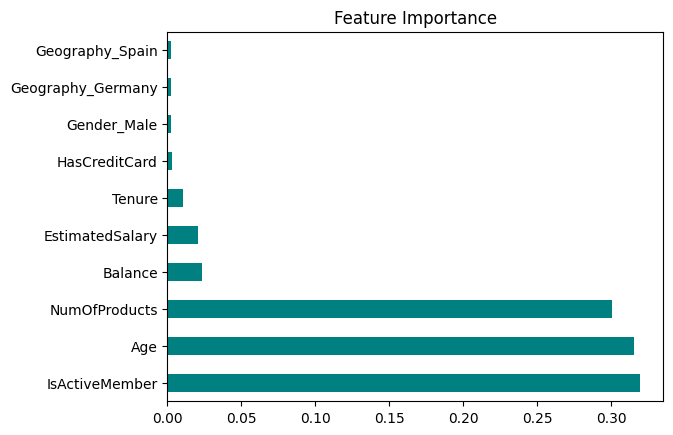

In [ ]:
# Feature importance 
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Feature Importance")
plt.show()

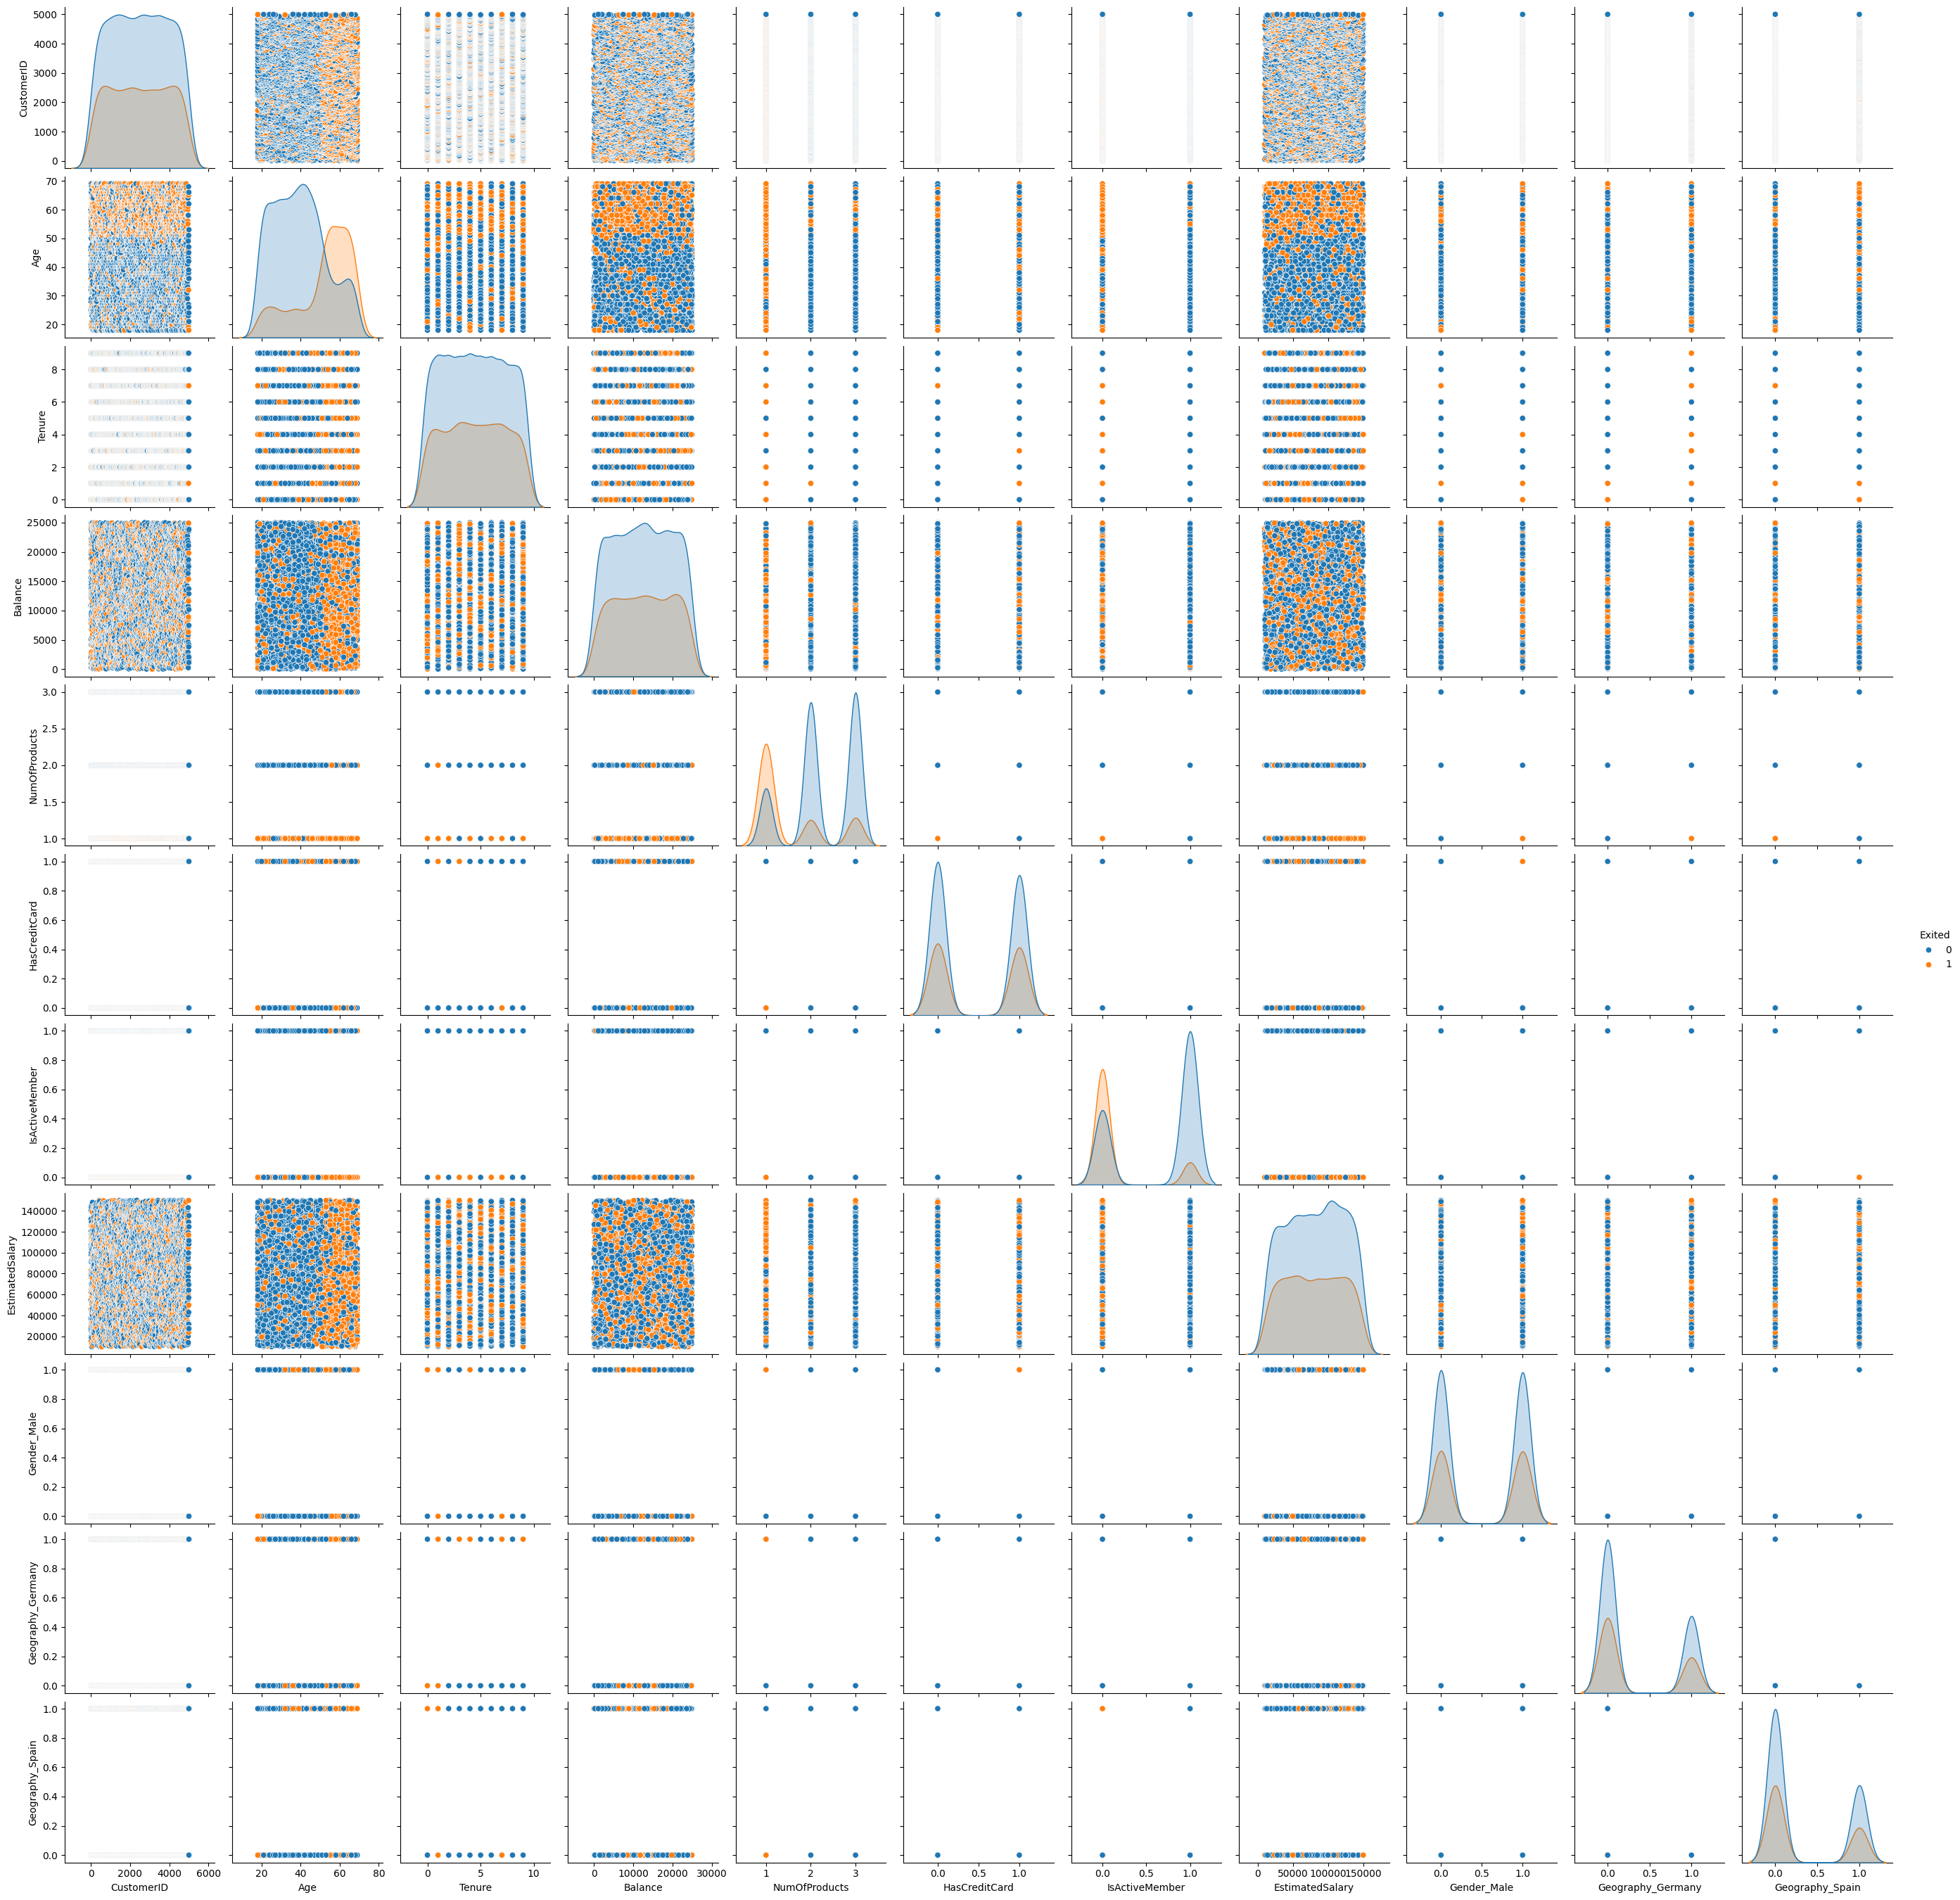

In [273]:
sns.pairplot(data, hue='Exited')

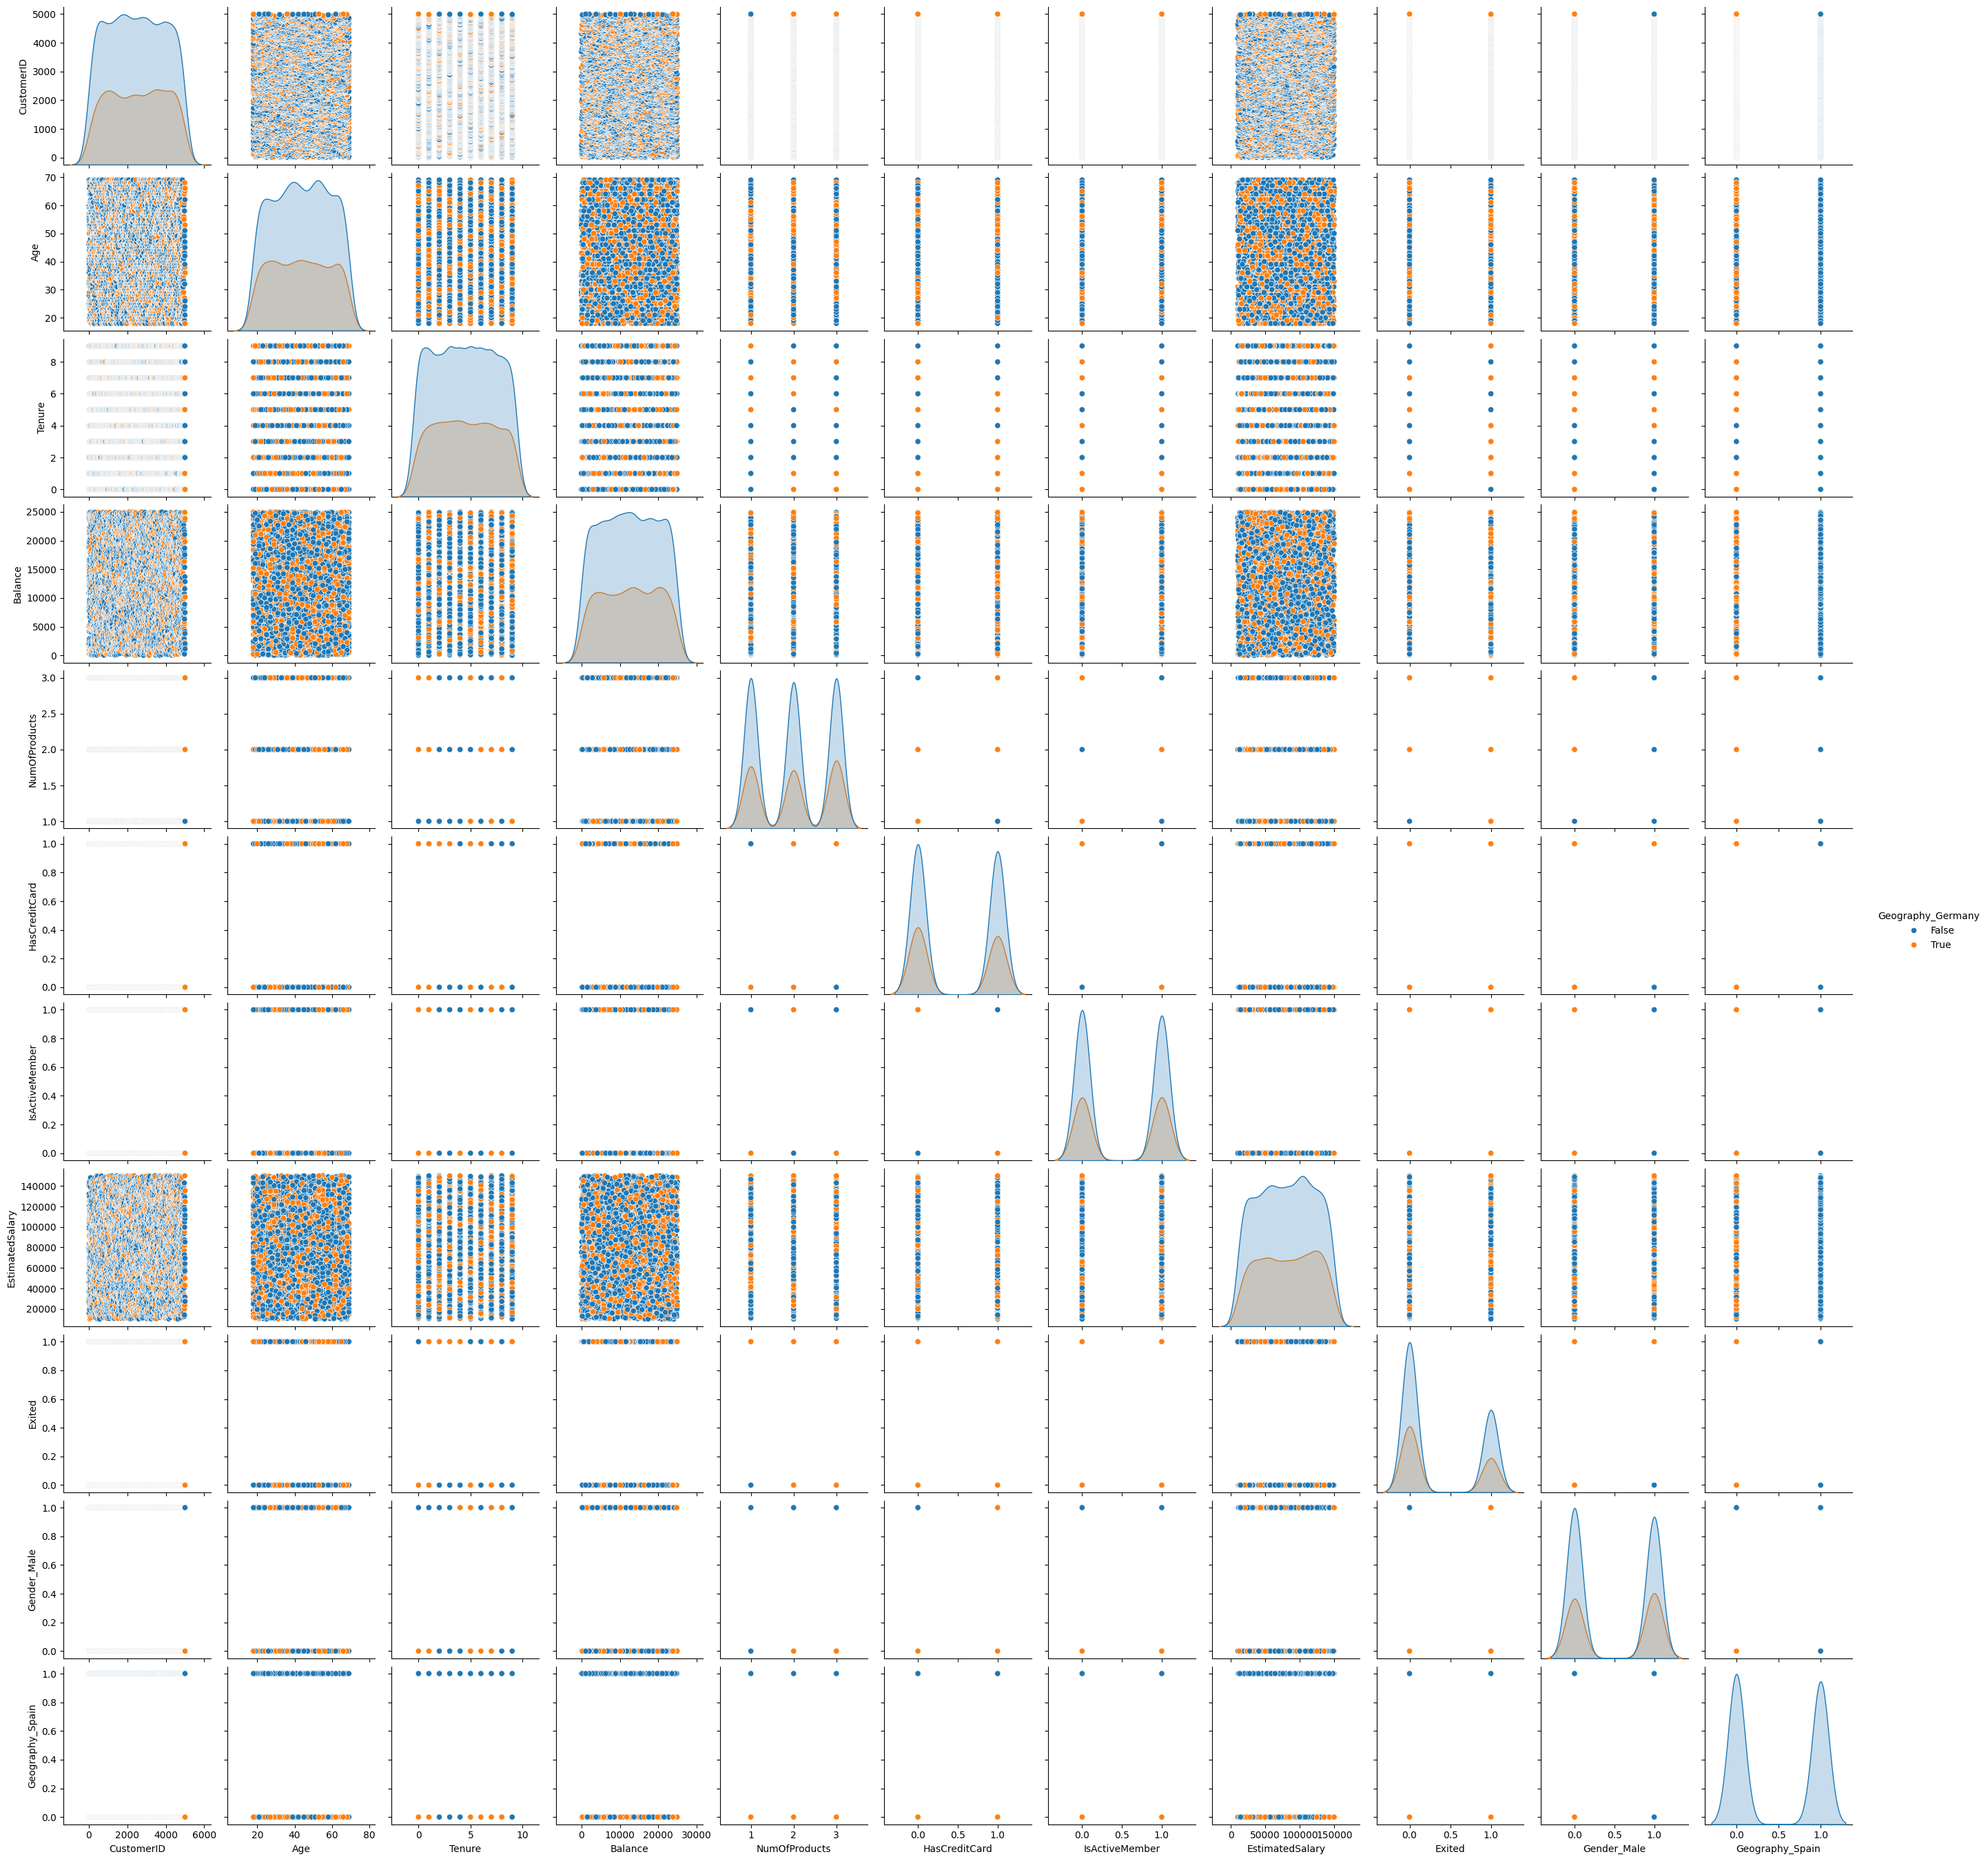

In [274]:
sns.pairplot(data, hue='Geography_Germany') 

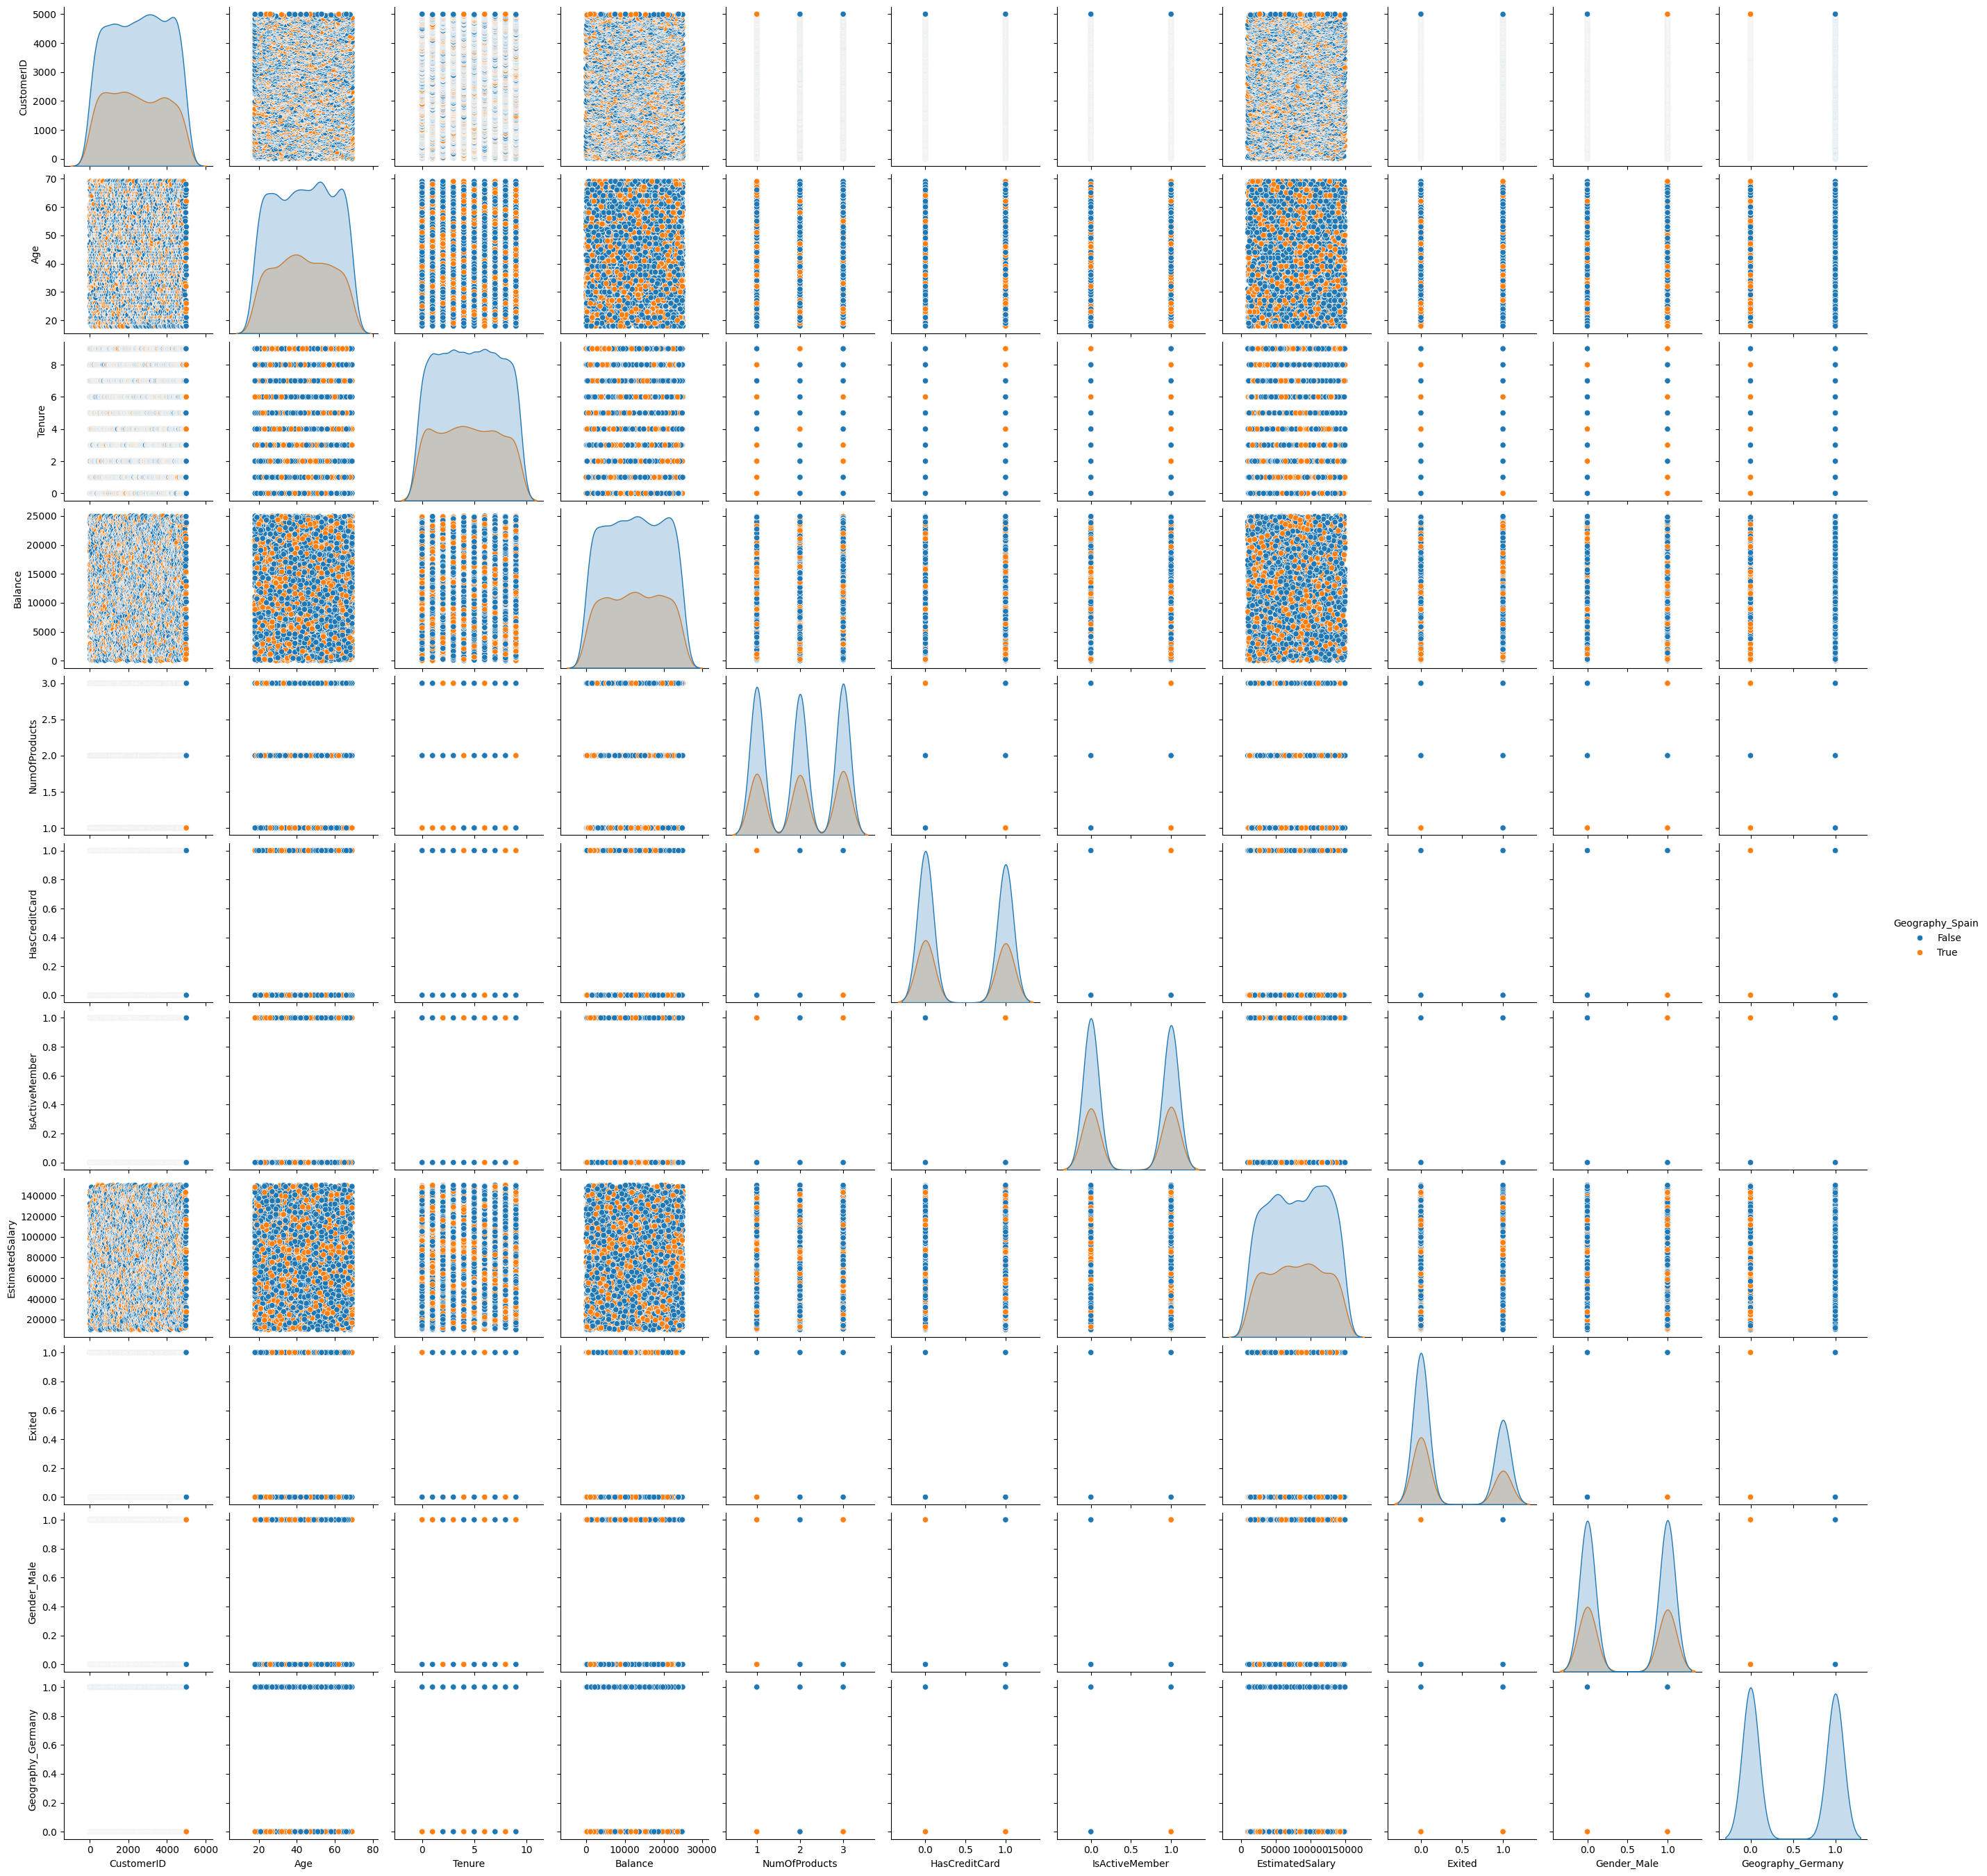

In [275]:
sns.pairplot(data, hue='Geography_Spain') 

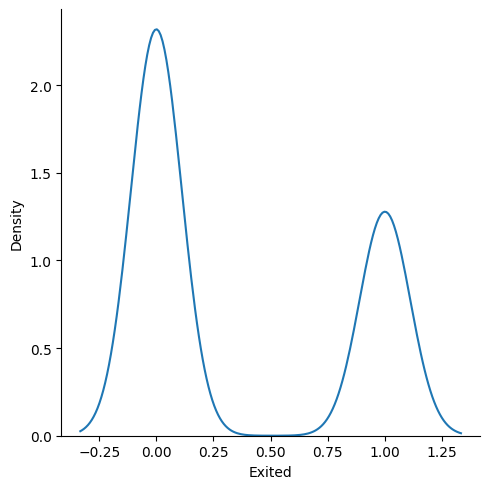

In [280]:
sns.displot(y_test, kind='kde')

In [ ]:
# Prediction made on new data 
new_data = pd.DataFrame({
    'Age': [43, 60],
    'Gender': ['Female', 'Male'],
    'Geography': ['France', 'Germany'],
    'Tenure': [4, 8],
    'Balance': [65000, 30000],
    'NumOfProducts': [2, 1],
    'HasCreditCard': [1, 1],
    'IsActiveMember': [1, 0],
    'EstimatedSalary': [70000, 120000]
})

new_data = pd.get_dummies(new_data, columns=['Gender', 'Geography'], drop_first=True)

# Align columns with training data
new_data = new_data.reindex(columns=X.columns, fill_value=0)

new_data_scaled = scaler.transform(new_data)
pred_labels = model.predict(new_data_scaled)
pred_probs = model.predict_proba(new_data_scaled)[:, 1]

new_data['Predicted_Exited'] = pred_labels
new_data['Churn_Probability'] = pred_probs
print(new_data)


   Age  Tenure  Balance  NumOfProducts  HasCreditCard  IsActiveMember  \
0   43       4    65000              2              1               1   
1   60       8    30000              1              1               0   

   EstimatedSalary  Gender_Male  Geography_Germany  Geography_Spain  \
0            70000        False              False                0   
1           120000         True               True                0   

   Predicted_Exited  Churn_Probability  
0                 0               0.00  
1                 1               0.98  
